<a href="https://colab.research.google.com/github/therealellam/CORE_ML_WK3/blob/main/DSP_CORE_MOD2_IP_WK3_ML_Bellah_Ellam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


>  # a) Specifying the Question



Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

> # b) Metrics for Success



Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

> # c) Understanding context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

> # d) Data Relevance

The dataset to use for this project can be found by following this link:http://bit.ly/hypothyroid_data. 

Below is the dataset glossary:

Dataset Columns

- Age
- Sex
- on_thyroxine
- query_on_thyroxine
- on_antithyroid_medicationthyroid_surgery
- query_hypothyroid
- query_hyperthyroid
- pregnant
- sick
- tumor
- lithium
- goitre
- TSH_measured
- TSH
- T3_measured
- T3
- TT4_measured
- TT4

# **2. Importing Libraries**

In [1]:
#We first import python libraries we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Loading the Dataset**

In [2]:
#Load the Data into a dataframe
#The dataset used in this project was provided in the following 
#url = "http://bit.ly/hypothyroid_data" 

df=pd.read_csv('/content/hypothyroid.csv')

#Viewing the first 5 entries
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


# **4. Checking the Data**

In [3]:
# Determining the no. of records in the dataset
df.shape

(3090, 26)

In [4]:
# Checking whether each column has an appropriate datatype
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [5]:
#Dataframe description

df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090
unique,2,93,2,2,2,2,2,2,2,2,2,2,2,2,2,235,2,69,2,263,2,150,2,255,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,2941,390,2182,2634,3035,3048,2988,2850,2850,3028,2992,3050,3088,2992,2634,879,2407,683,2846,244,2847,243,2848,242,2835,2835


# **5. Tidying the Dataset**

In [19]:
#Editing the  question markes in the dataset

df["age"].replace({"?": "51"}, inplace=True)
df["TSH"].replace({"?": "0"}, inplace=True)
df["T3"].replace({"?": "0"}, inplace=True)
df["TT4"].replace({"?": "0"}, inplace=True)
df["T4U"].replace({"?": "0"}, inplace=True)
df["FTI"].replace({"?": "0"}, inplace=True)

In [7]:
#Checking for Missing Values

df.isnull().values.any()

False

In [8]:
# Dealing with the Missing Data

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

# **7. Checking for & Removing Duplicates**

In [9]:
#checking data for duplicates
df.duplicated().values.any()

True

In [10]:
df.duplicated().sum()

77

In [11]:
#Dropping Duplicates

df.drop_duplicates(keep=False,inplace=True)

df.duplicated().values.any()


False

# **EXPLORATORY ANALYSIS**

# **Univariate Analysis - Categorical Variables**

In [ ]:
#checking column data type
df.dtypes

In [13]:
#Frequency Tables

print("Sex Column Frequency table")
display(df.sex.value_counts())
print('')

print("Status Column Frequency table")
display(df.status.value_counts())
print('')


Sex Column Frequency table


F    2057
M     880
Name: sex, dtype: int64


Status Column Frequency table


negative       2808
hypothyroid     129
Name: status, dtype: int64

In [14]:
#Importing the seaborn library for visualization

import seaborn as sns

#setting a style

sns.set(style='whitegrid', palette='muted', color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Status')

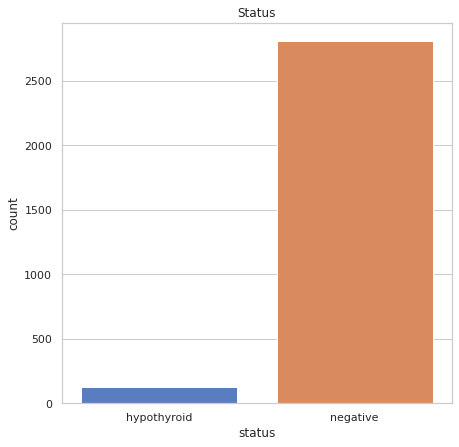

In [15]:
#plotting the condition column
plt.figure(figsize=(7, 7))
sns.countplot(df.status)
plt.title('Status')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex by Frequency')

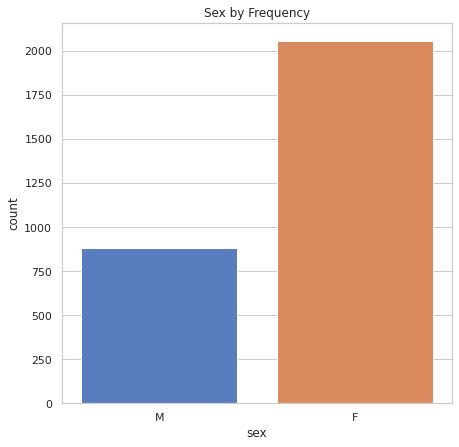

In [16]:
#plotting the grade column
plt.figure(figsize=(7, 7))
sns.countplot(df.sex)
plt.title('Sex by Frequency')

Most respondents were female

In [ ]:
#Analyzing numerical columns

age_counts = df["age"].value_counts()
# df.groupby('sex').age.plot(kind='kde')
import plotly.express as px
fig = px.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

# **Bivariate Analysis**

Text(0.5, 1.0, 'Status vs Pregnancy')

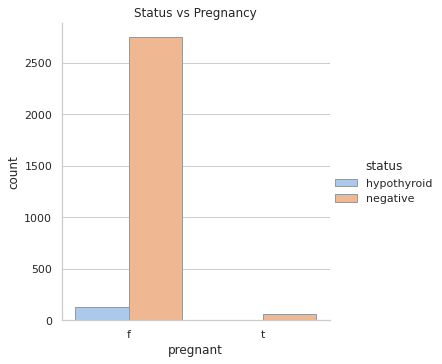

In [18]:
#checking how pregnancy relates to status

sns.catplot(x="pregnant", hue="status", kind="count",
            palette="pastel", edgecolor=".6", data=df)
plt.title("Status vs Pregnancy")

#**Decision Tree Classifier**

In [20]:
#we will first perform one hot encoding since most of our variables are not numerical


##LABEL ENCODING

# Most of our variables are categorical and thus need to convert since 
# many ML algorithms work better with numerical inputs

#We thus use Label-encoder and One-Hot-Encoding to change our categorical values to numeric


categorical_cols = ['status', 'sex', 'on_thyroxine','query_on_thyroxine',
                    'on_antithyroid_medication','thyroid_surgery','query_hypothyroid', 'query_hyperthyroid',
                    'pregnant', 'sick', 'tumor', 'lithium', 'goitre'] 

from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,y,0,y,0.2,y,4,y,1,y,0,n,?
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [25]:
## ONE-HOT-ENCODING

#Though label encoding is straight but it has the disadvantage that the numeric values 
#can be misinterpreted by algorithms as having some sort of hierarchy/order in them. 
#This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. 
#In this strategy, each category value is converted into a new column 
#and assigned a 1 or 0 (notation for true/false) value to the column

#To achieve one hot encoding from our raw data, we use below

df_new = pd.get_dummies(df, columns = categorical_cols, drop_first=True)
df_new.head()

,age,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,status_1,sex_1,sex_2,on_thyroxine_1,query_on_thyroxine_1,on_antithyroid_medication_1,thyroid_surgery_1,query_hypothyroid_1,query_hyperthyroid_1,pregnant_1,sick_1,tumor_1,lithium_1,goitre_1
0,72,y,30,y,0.60,y,15,y,1.48,y,10,n,?,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,y,145,y,1.70,y,19,y,1.13,y,17,n,?,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,y,0,y,0.20,y,4,y,1,y,0,n,?,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,y,430,y,0.40,y,6,y,1.04,y,6,n,?,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#Making a list of Dependent & Independent variables

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid
#, so let's use that column as our Y 
y = df['status'].values

test_features = ['sex', 'age','on_thyroxine','query_on_thyroxine',
                    'on_antithyroid_medication','thyroid_surgery','query_hypothyroid', 'query_hyperthyroid',
                    'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3', 'TT4','T4U', 'FTI']
# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
#Let's finally create our model and assess its accuracy.
# Checking the accuracy of a classifier is easy thanks to the metrics.accuracy_score function.


# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9914965986394558


In [27]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.008503401360544218
Mean Squared Error: 0.008503401360544218
Root Mean Squared Error: 0.09221388919541469


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



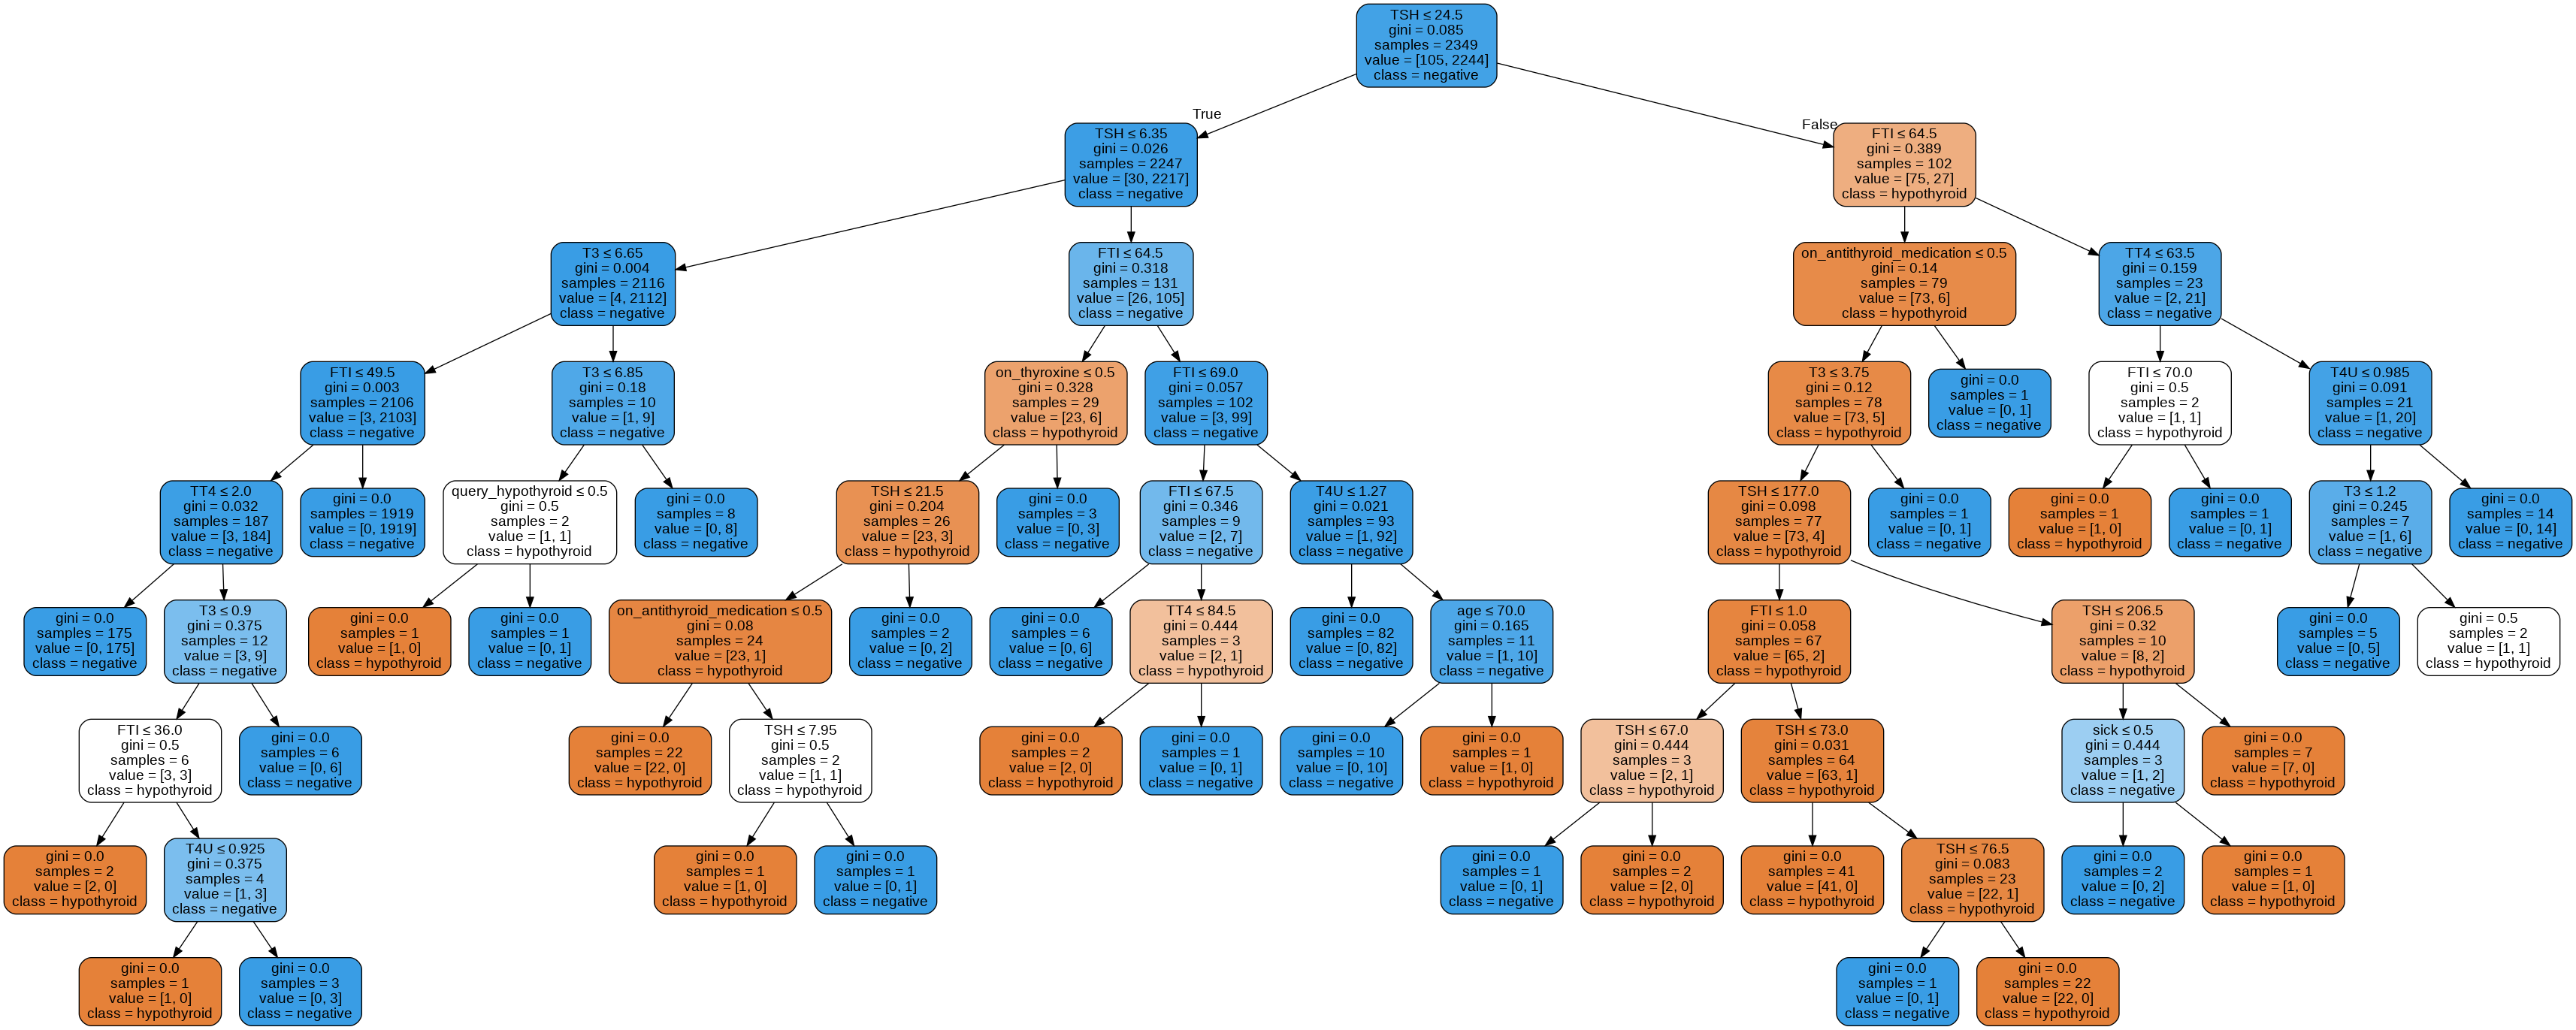

In [23]:
#Visualizing our decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Our Random Forest classifier Accuracy is:",metrics.accuracy_score(y_test, y_pred))

Our Random Forest classifier Accuracy is: 0.9948979591836735


In [25]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.006802721088435374
Mean Squared Error: 0.006802721088435374
Root Mean Squared Error: 0.08247860988423225


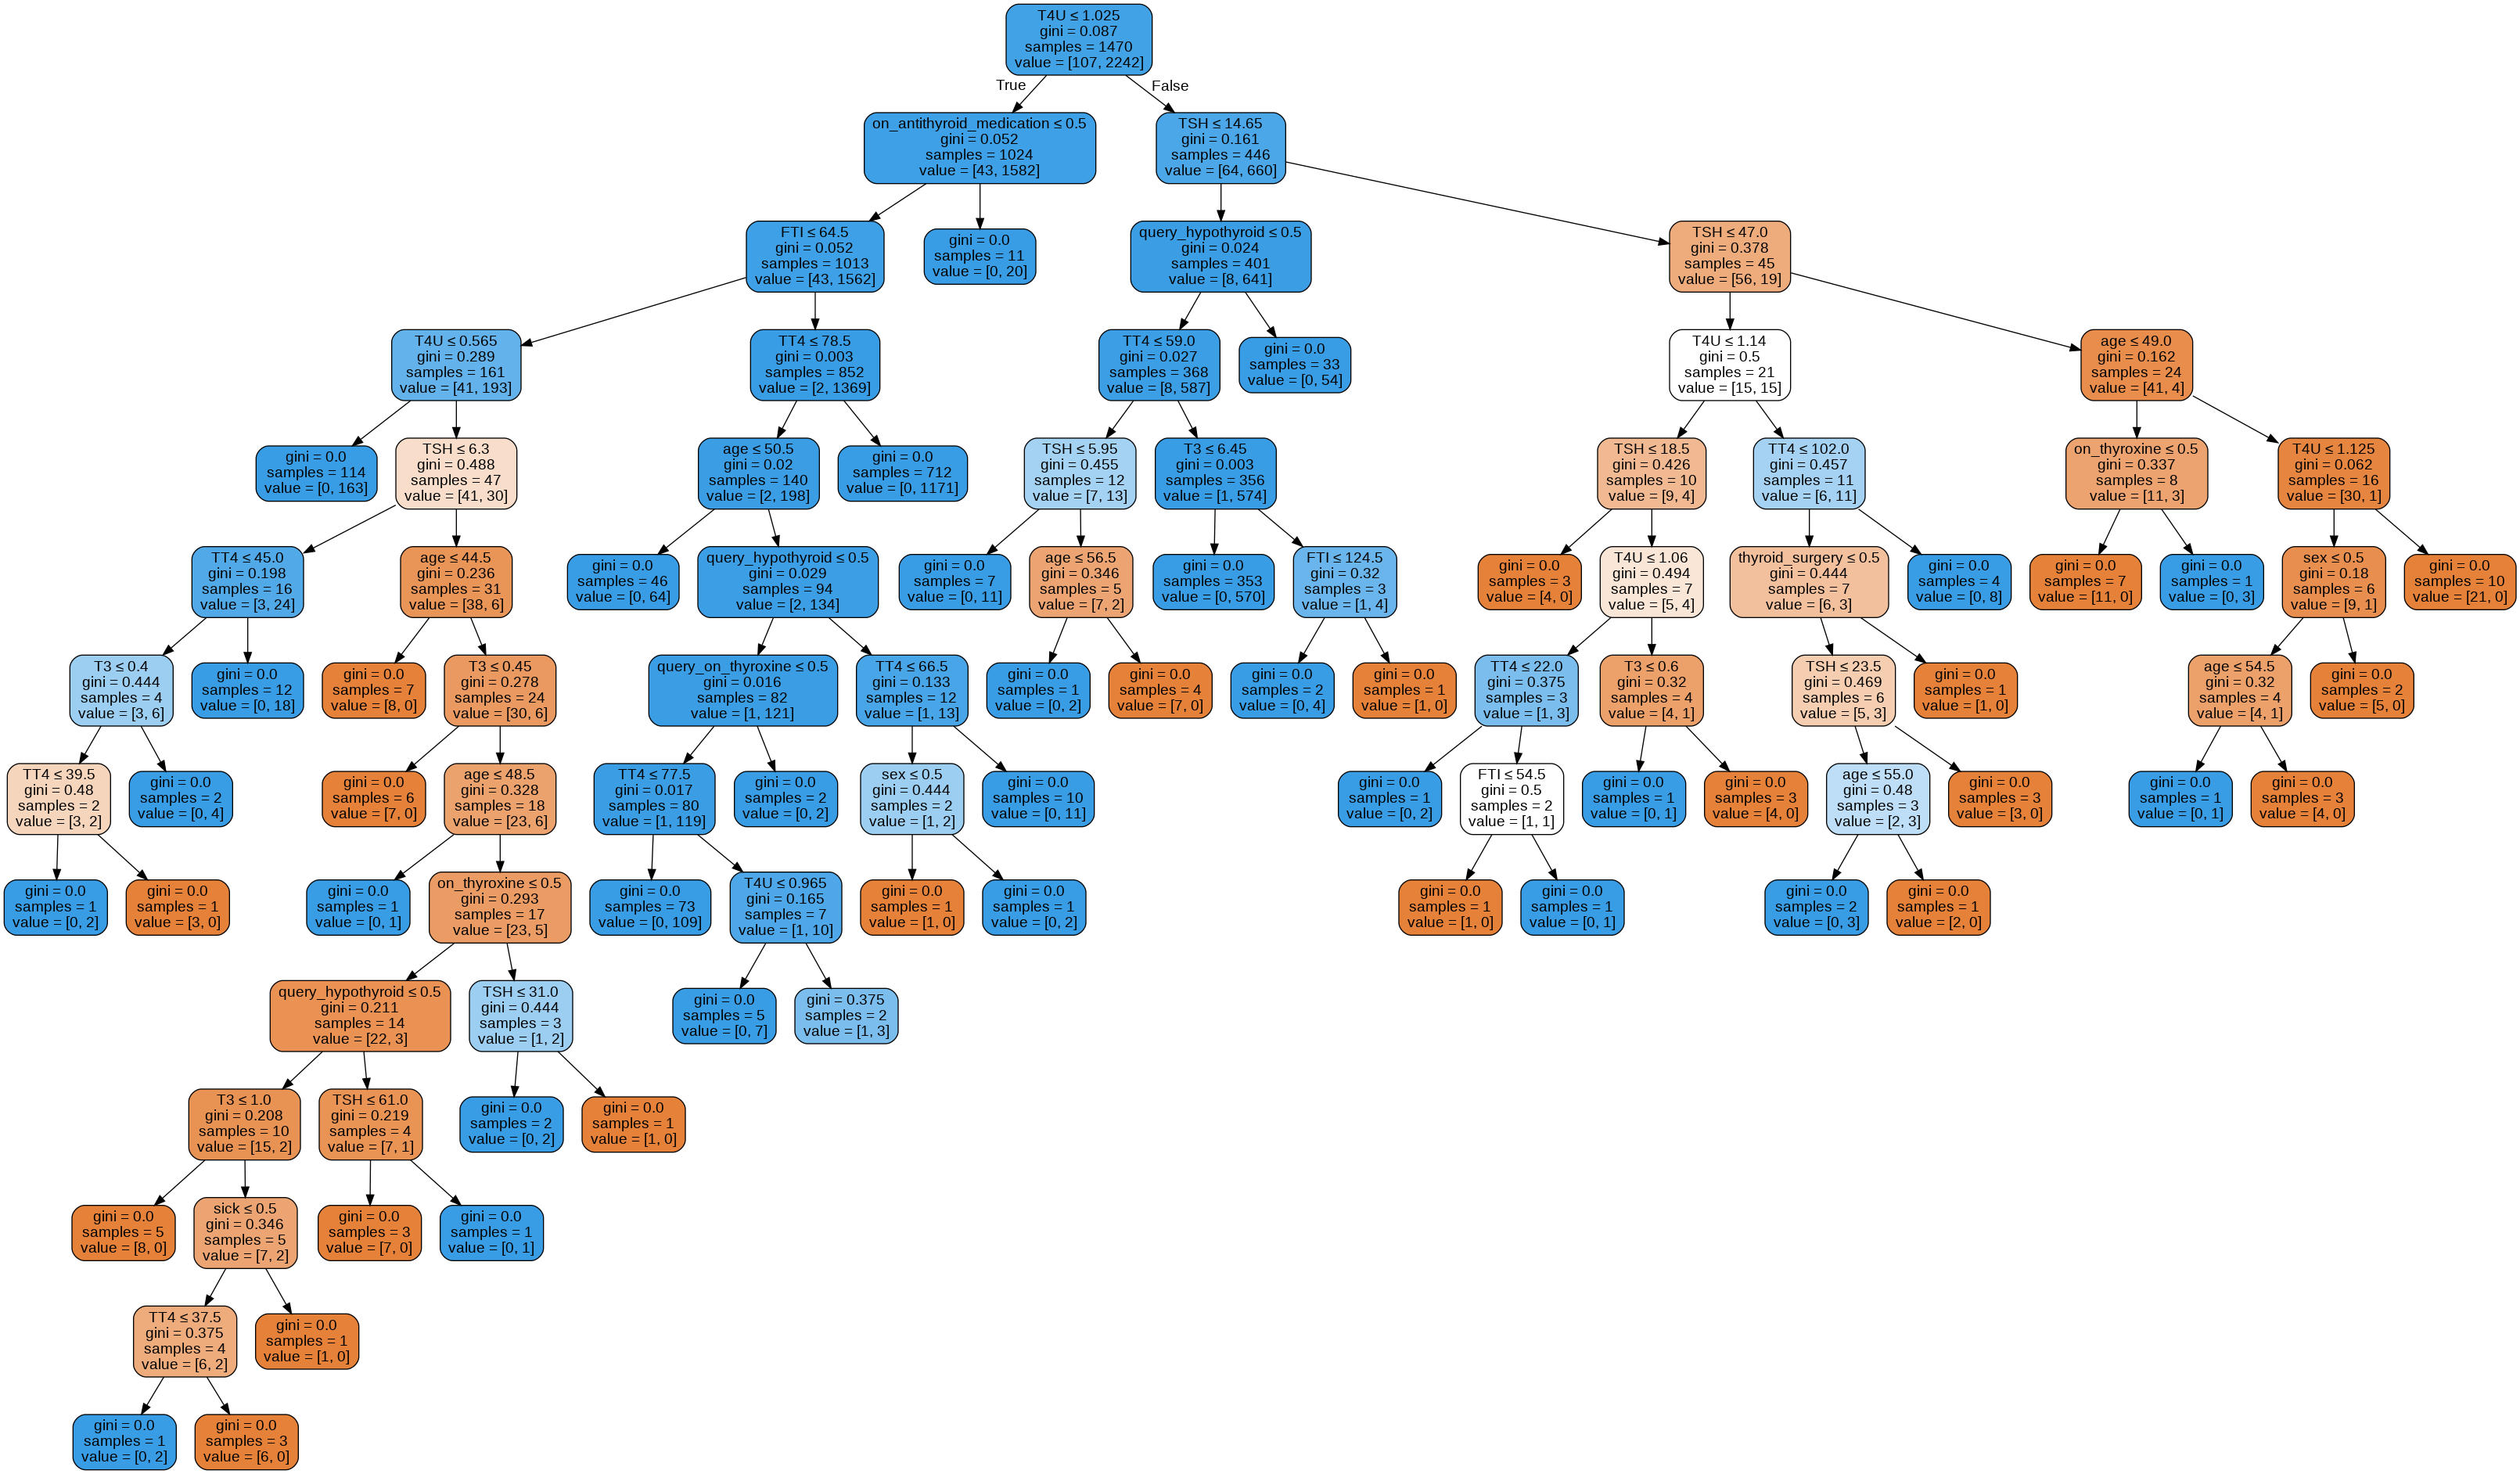

In [31]:
#Visuaizing the Forest

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = clf.estimators_[20]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

# Ada Boost Classifier

In [34]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Our adaboost classifier model Accuracy is:",metrics.accuracy_score(y_test, y_pred))

Our adaboost classifier model Accuracy is: 0.9591836734693877


# SVM Classifier

In [36]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("The Linear kernel returned an Accuracy of:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9812925170068028


In [38]:
#Create a polynomial svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("The polynomial kernel returned an Accuracy of:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9625850340136054


In [39]:
#Create a polynomial svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("The rbf kernel returned an Accuracy of:",metrics.accuracy_score(y_test, y_pred))

The rbf kernel returned an Accuracy of: 0.9914965986394558


The rbf kernel had a better accuracy hence performed best.